In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get data from WHO: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-tobacco-control-monitor-current-tobaccouse-tobaccosmoking-cigarrettesmoking-agestd-tobagestdcurr
tobacco_use_full = pd.read_csv('./TobaccoUseData.csv')
tobacco_use_full.head(1)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,M_Est_tob_curr_std,Estimate of current tobacco use prevalence (%)...,numeric,SEAR,South-East Asia,Country,PRK,Democratic People's Republic of Korea,Year,2025,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Projected from surveys completed prior to 2020...,EN,2022-01-16T23:00:00.000Z


In [3]:
tobacco_use = tobacco_use_full[['Period', 'ParentLocation', 'Location type', 'Location', 'Value']]
tobacco_use.head(3)

,Period,ParentLocation,Location type,Location,Value
0,2025,South-East Asia,Country,Democratic People's Republic of Korea,0.0
1,2025,Europe,Country,Azerbaijan,0.1
2,2025,Africa,Country,Eritrea,0.2


In [8]:
# 2020 is the last real data point as the last update on this data set is 2022/01/17 and it doesn't feature 2021
tobacco_use_2020 = tobacco_use[tobacco_use['Period'] == 2020]
tobacco_use_2020_per_continent_summary = tobacco_use_2020.groupby('ParentLocation')['Value'].agg([np.mean, np.std])
tobacco_use_2020_per_continent_summary

,mean,std
ParentLocation,,
Africa,10.104201,8.893918
Americas,12.115046,7.437227
Eastern Mediterranean,16.654710,13.498557
Europe,24.888322,10.690888
South-East Asia,22.603889,18.665660
Western Pacific,23.805333,14.342116


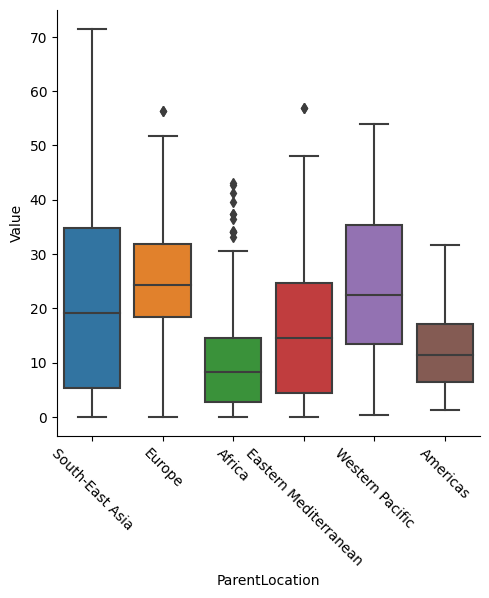

In [11]:
sns.catplot(x='ParentLocation', y='Value', data=tobacco_use_2020, kind='box')
plt.xticks(rotation=-45)
plt.show()

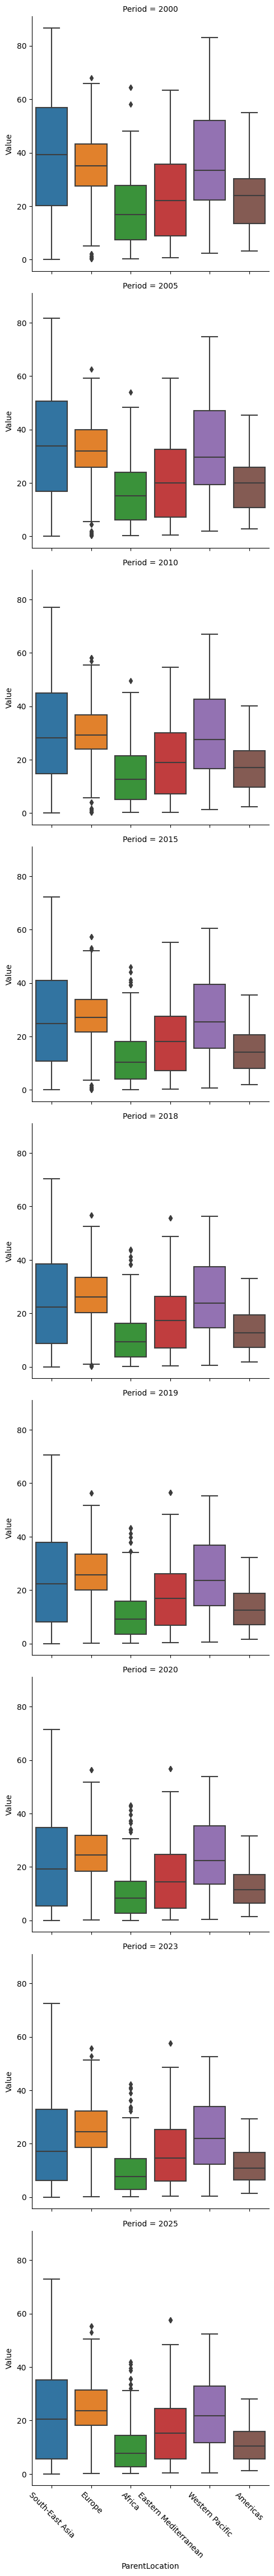

In [12]:
# Evolution of smoking for each continent
sns.catplot(x='ParentLocation', y='Value', row='Period', data=tobacco_use, kind='box')
plt.xticks(rotation=-45)
plt.show()